In [1]:

#  --> sequential --> comparison function
# img_size=32
# shape=(32,32,3)
# filters=8 (fil_01)
# filters=32 (fil_02)
# filters=160 (fil_03)
# units=84 (dense_01)
# units=9 (dense_02)
# batch_size=32 (bat_size)
# epochs=10 (epo)


In [2]:

def comparison_seq(img_size,fil_01,fil_02,fil_03,dense_01,bat_size,epo):
    
    import numpy as np
    import pandas as pd
    from pathlib import Path
    import matplotlib.pyplot as plt
    import seaborn as sns
    import warnings
    import os
    import cv2
    from sklearn.preprocessing import LabelEncoder
    from tensorflow.keras.utils import to_categorical
    from sklearn.model_selection import train_test_split
    import tensorflow as tf
    from tensorflow.keras import Sequential
    from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, MaxPool2D
    
    root_dir = './data_vehicle_recognition/vehicles/'
    data = []
    labels = []
    label_names = []

    for label in os.listdir(root_dir):
        path = "./data_vehicle_recognition/vehicles/{0}/".format(label)
        folder_data = os.listdir(path)
        for image_path in folder_data:
            img = cv2.imread(path + image_path)
            img = cv2.resize(img, (img_size, img_size))
            data.append(img)
            labels.append(label)
            if not label in label_names:
                label_names.append(label)
                
    data = np.array(data)
    labels = np.array(labels)
    
    le = LabelEncoder()
    labels = le.fit_transform(labels)
    labels = to_categorical(labels)
    
    #new = np.arange(525)
    #np.random.shuffle(new)
    #data = data[new]
    #labels = labels[new]
    
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=33)
    
    model = Sequential([
          Input(shape=(img_size,img_size,3)),
          Conv2D(filters=fil_01, kernel_size=(5,5), padding="same", activation="relu"),
          MaxPool2D(pool_size=(2,2)),
          Conv2D(filters=fil_02, kernel_size=(5,5), padding="same", activation="relu"),
          MaxPool2D(pool_size=(2,2)),
          Conv2D(filters=fil_03, kernel_size=(5,5), padding="same", activation="relu"),
          Flatten(),
          Dense(units=dense_01, activation="relu"),
          Dense(units=9, activation="softmax"),
      ])
    
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    
    history = model.fit(X_train,y_train, batch_size=bat_size, epochs=epo, validation_data=(X_test, y_test))
    
    history_df = pd.DataFrame(history.history)
    
    figure, axes = plt.subplots(1, 2, figsize=(10,4))
    axes[0].plot(pd.DataFrame(history_df)[['accuracy','val_accuracy']])
    axes[0].set_title("Accuracy")
    axes[1].plot(pd.DataFrame(history_df)[['loss','val_loss']])
    axes[1].set_title("Loss")
    plt.legend(['train', 'validation'])
    plt.show()
    
    y_pred = model.predict(X_test) 
    label_classes = y_pred.argmax(axis=-1)
    label_classes
    liste_indices = []
    for i in y_test:
        a = 0
        for j in i:
            if j == 1:
                liste_indices.append(a)
            a += 1
    liste_indices_arr = np.asarray(liste_indices)
    falses = 0
    fig, ax = plt.subplots(3, 6, subplot_kw=dict(xticks=[], yticks=[]), figsize=(10,6))
    for i, axi in enumerate(ax.flat):
        color = 'black'
        if label_classes[i]!=liste_indices_arr[i]:
            color='r'
            falses += 1
        axi.imshow(X_test[i], cmap='Blues_r')
        axi.set_title(label_names[label_classes[i]], color=color)
    plt.show()
    model.summary()
    print(f"False Predictions of total 18: --> {falses}!")
    arg_dict = {"Image_Size":img_size,"Filter_01":fil_01,"Filter_02":fil_02,"Filter_03":fil_03,"Units":dense_01,"Batch_Size":bat_size,"Epochs":epo}
    
    return history_df.tail(1),model.evaluate(X_test,y_test),arg_dict


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.1289 - loss: 41.4299 - val_accuracy: 0.1524 - val_loss: 2.2197
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1443 - loss: 2.2725 - val_accuracy: 0.1905 - val_loss: 2.1286
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2290 - loss: 2.0232 - val_accuracy: 0.1619 - val_loss: 2.1158
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3445 - loss: 1.7213 - val_accuracy: 0.2476 - val_loss: 1.8680
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5684 - loss: 1.3316 - val_accuracy: 0.1619 - val_loss: 2.4097
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6518 - loss: 1.1220 - val_accuracy: 0.3619 - val_loss: 1.9846
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7907 - loss: 0.6957 - val_accuracy: 0.4571 - val_loss: 1.6141
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9110 - loss: 0.3998 - val_accuracy: 0.4286 - 

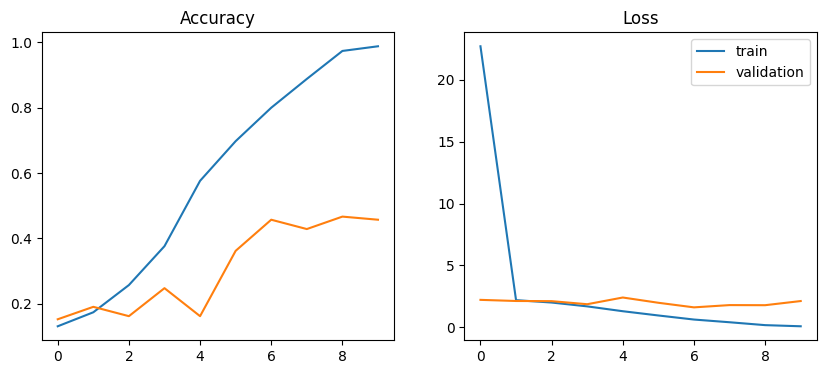

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


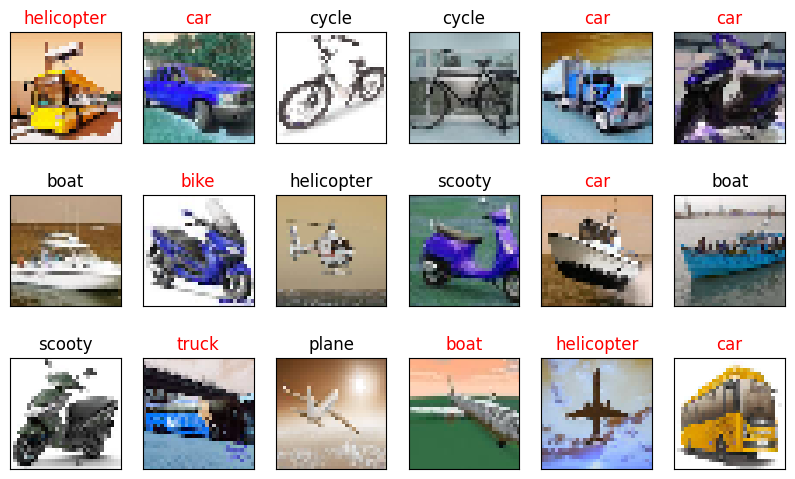

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                    │ (None, 32, 32, 8)             │         608 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d (MaxPooling2D)       │ (None, 16, 16, 8)             │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_1 (Conv2D)                  │ (None, 16, 16, 32)            │       6,432 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_1 (MaxPooling2D)     │ (None, 8, 8, 32)              │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_2 (Conv2D)                  │ (None, 8, 8, 160)             │     128,160 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten (Flatten)                  │ (None, 10240)                 │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense (Dense)                      │ (None, 84)                    │     860,244 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_1 (Dense)                    │ (None, 9)                     │         765 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 2,988,629 (11.40 MB)

 Trainable params: 996,209 (3.80 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,992,420 (7.60 MB)

False Predictions of total 18: --> 10!
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4579 - loss: 2.3806 


In [3]:

a = 0
b = 0
c = 0
a,b,c = comparison_seq(32,8,32,160,84,32,10)


In [4]:
a,b,c

(   accuracy      loss  val_accuracy  val_loss
 9  0.988095  0.085944      0.457143  2.124031,
 [2.124030590057373, 0.4571428596973419],
 {'Image_Size': 32,
  'Filter_01': 8,
  'Filter_02': 32,
  'Filter_03': 160,
  'Units': 84,
  'Batch_Size': 32,
  'Epochs': 10})

In [5]:
a

,accuracy,loss,val_accuracy,val_loss
9,0.988095,0.085944,0.457143,2.124031


In [6]:
b

[2.124030590057373, 0.4571428596973419]

In [7]:
c

{'Image_Size': 32,
 'Filter_01': 8,
 'Filter_02': 32,
 'Filter_03': 160,
 'Units': 84,
 'Batch_Size': 32,
 'Epochs': 10}